In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.colors import LinearSegmentedColormap, Normalize
import argparse

from tools.geometry import *
from tools.visualization import *

In [7]:
cyl_center, cyl_axis, cyl_radius, cyl_radius, cyl_height, cyl_barrel_grid, cyl_cap_rings, cyl_sensor_radius = load_cyl_geom('config/cyl_geom_config.json')
detector = generate_detector('config/cyl_geom_config.json')
evt_ID = 0

In [8]:
def process_file(filename):
    # Extract info from h5 file
    with h5py.File(filename, 'r') as f:
    
        # Access datasets
        h5_evt_ids = f['evt_id']
        h5_evt_pos = f['positions']
        h5_evt_hit_idx = f['event_hits_index']
        h5_evt_hit_IDs = f['hit_pmt']
        h5_evt_hit_Qs = f['hit_charge']
        h5_evt_hit_Ts = f['hit_time']
    
        # Access data
        evt_ids = h5_evt_ids[:]
        evt_pos = h5_evt_pos[:]
        evt_hit_idx = h5_evt_hit_idx[:]
        evt_hit_IDs = h5_evt_hit_IDs[:]
        evt_hit_Qs = h5_evt_hit_Qs[:]
        evt_hit_Ts = h5_evt_hit_Ts[:]
    # -----------------------------
    
    
    # Process info to make it compatible with event display format
    IDs = None
    if evt_ID == 0:
        IDs = evt_hit_IDs[0:evt_hit_idx[0]]
        Qs  = evt_hit_Qs[0:evt_hit_idx[0]]
        Ts  = evt_hit_Ts[0:evt_hit_idx[0]]
    else:
        IDs = evt_hit_IDs[evt_hit_idx[evt_ID-1]:evt_hit_idx[evt_ID]]
        Qs  = evt_hit_Qs[evt_hit_idx[evt_ID-1]:evt_hit_idx[evt_ID]]
        Ts  = evt_hit_Ts[evt_hit_idx[evt_ID-1]:evt_hit_idx[evt_ID]]
    
    print("Number of PMTs: ", len(detector.all_points))
    
    ID_to_PE = np.zeros(len(detector.all_points))
    ID_to_PE[IDs] = Qs
    ID_to_position = {i:x for i,x in enumerate(detector.all_points)}
    ID_to_case = detector.ID_to_case
    ID_to_PE = {i:x for i,x in enumerate(ID_to_PE)}
    # -----------------------------

    return ID_to_position, ID_to_PE, ID_to_case

Number of PMTs:  9946


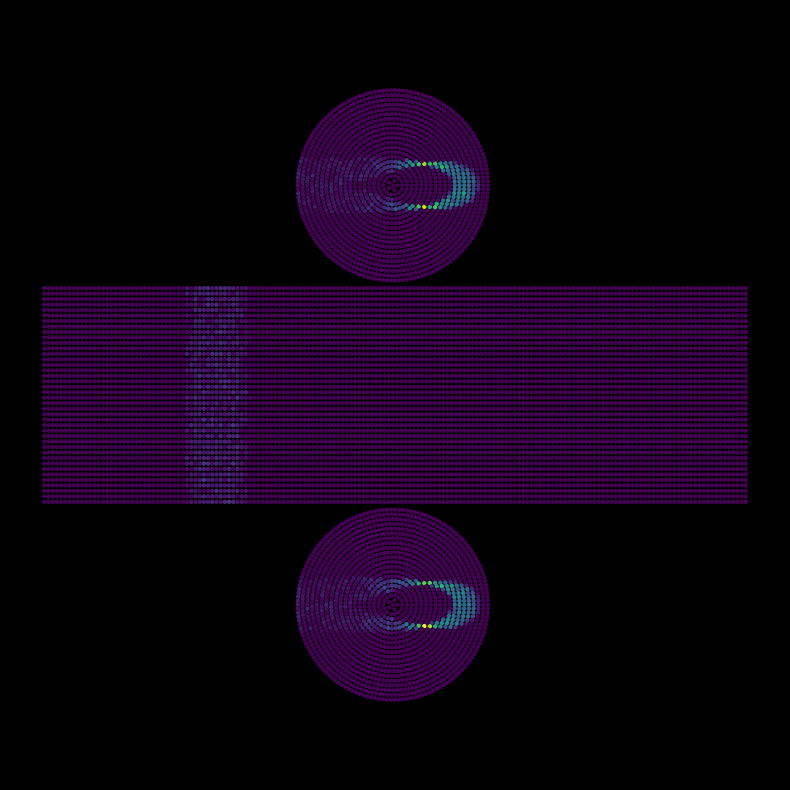

In [12]:
ID_to_position, ID_to_PE, ID_to_case = process_file('autodiff_datasets/data_events.h5')
show_2D_display(ID_to_position, ID_to_PE, ID_to_case, cyl_sensor_radius, cyl_radius, cyl_height)#, file_name='evt_example.pdf')

Number of PMTs:  9946


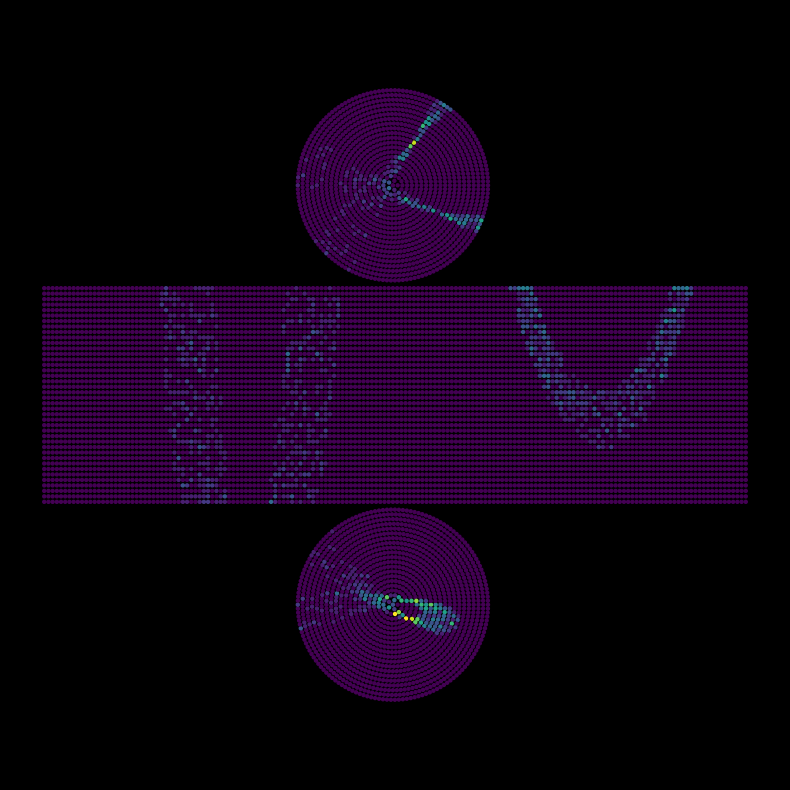

Number of PMTs:  9946


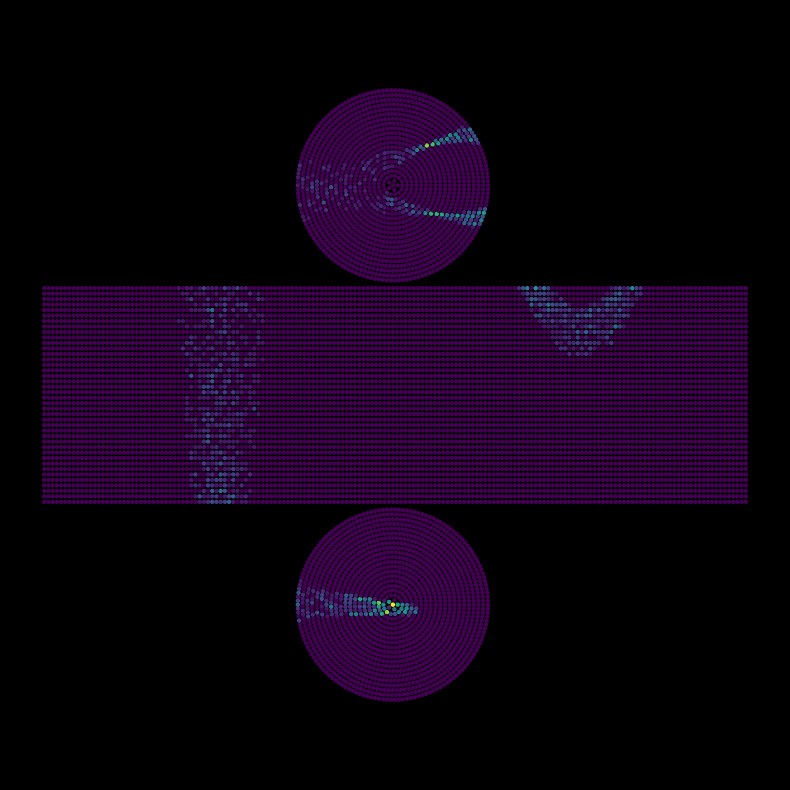

Number of PMTs:  9946


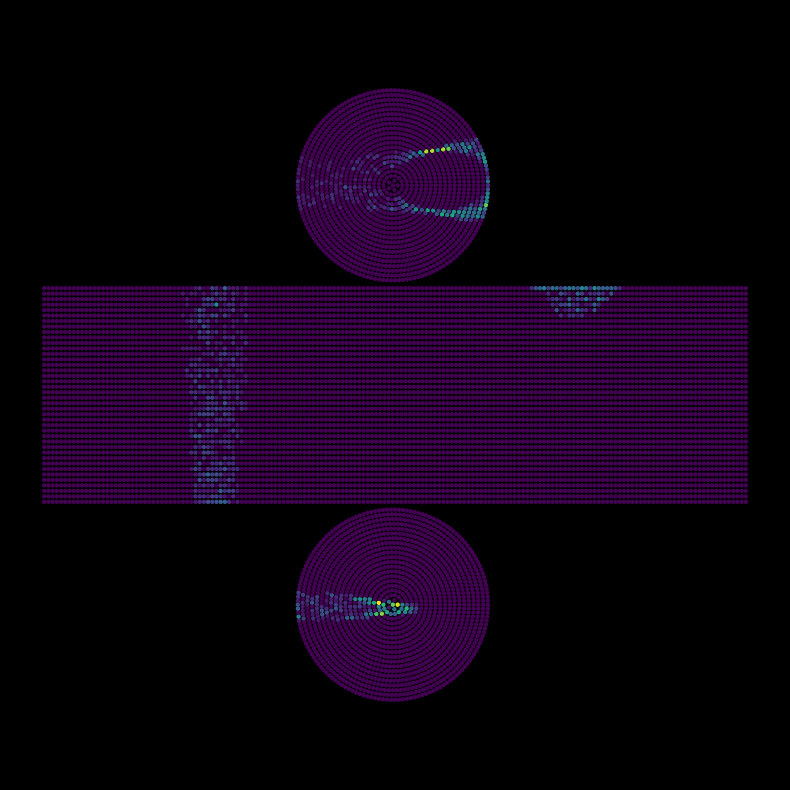

Number of PMTs:  9946


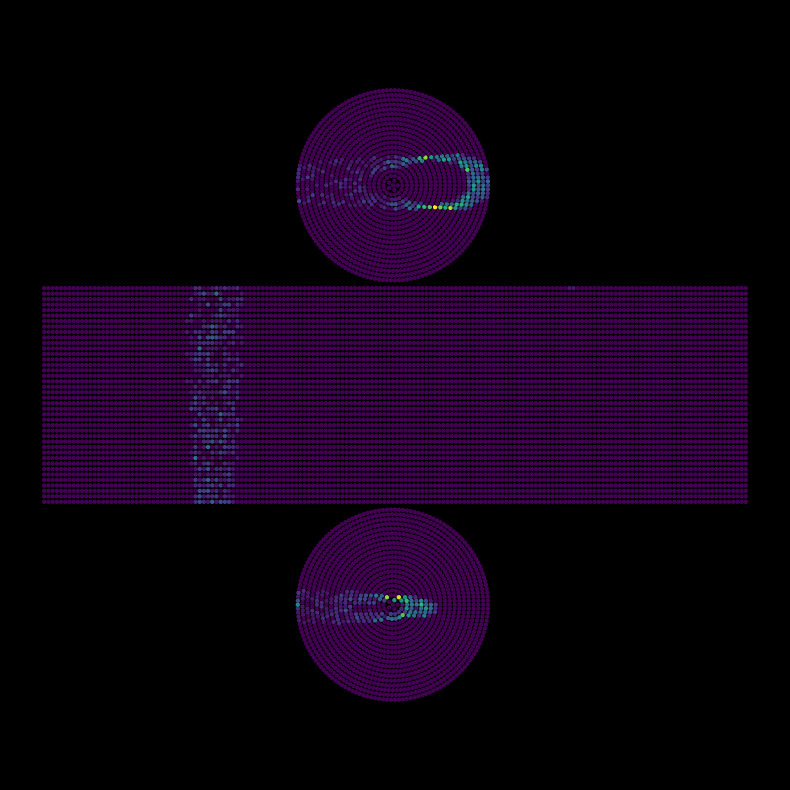

Number of PMTs:  9946


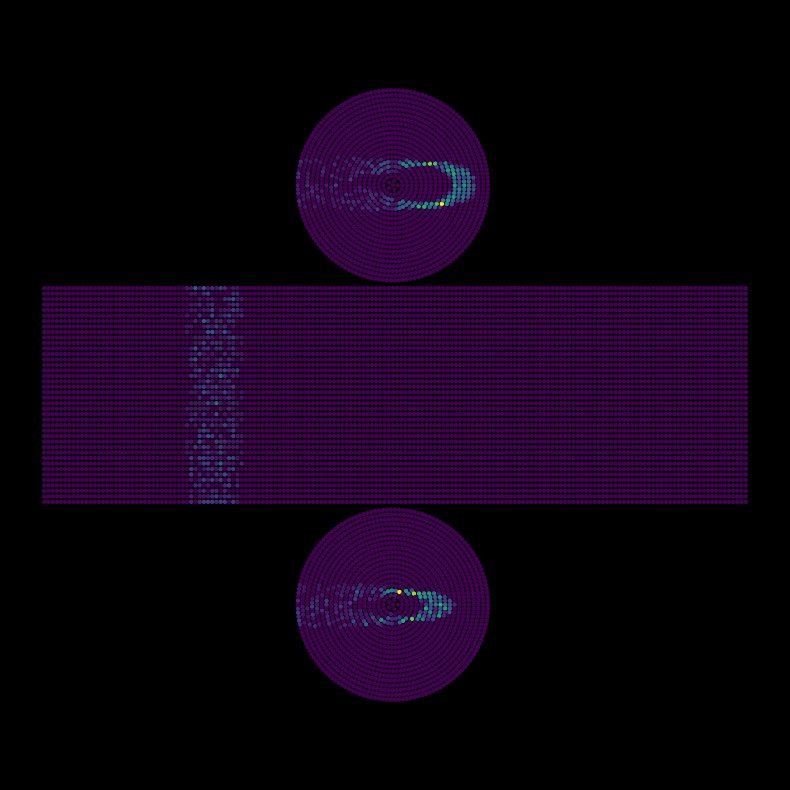

Number of PMTs:  9946


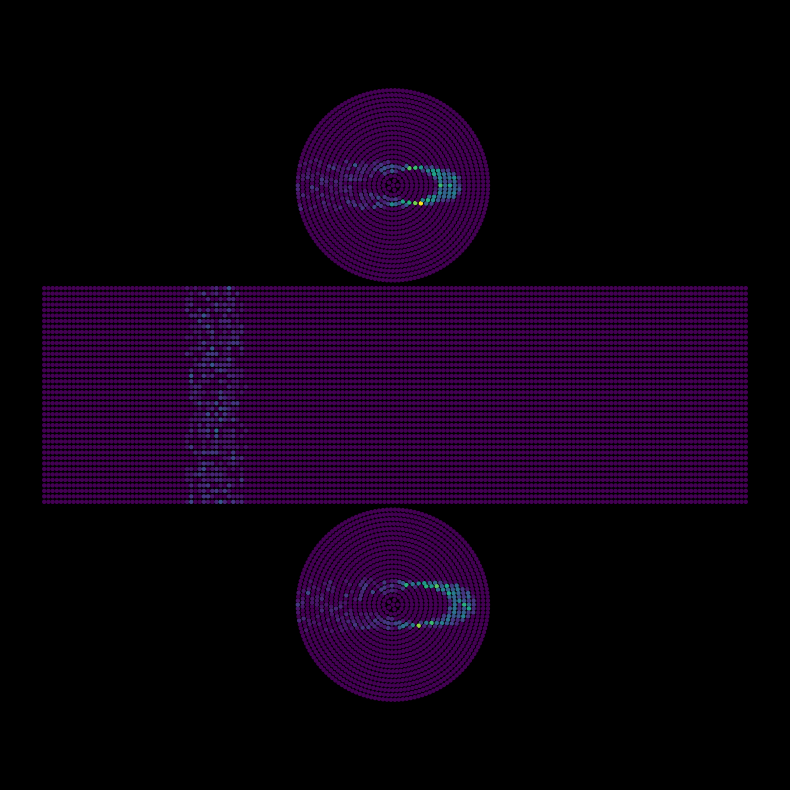

Number of PMTs:  9946


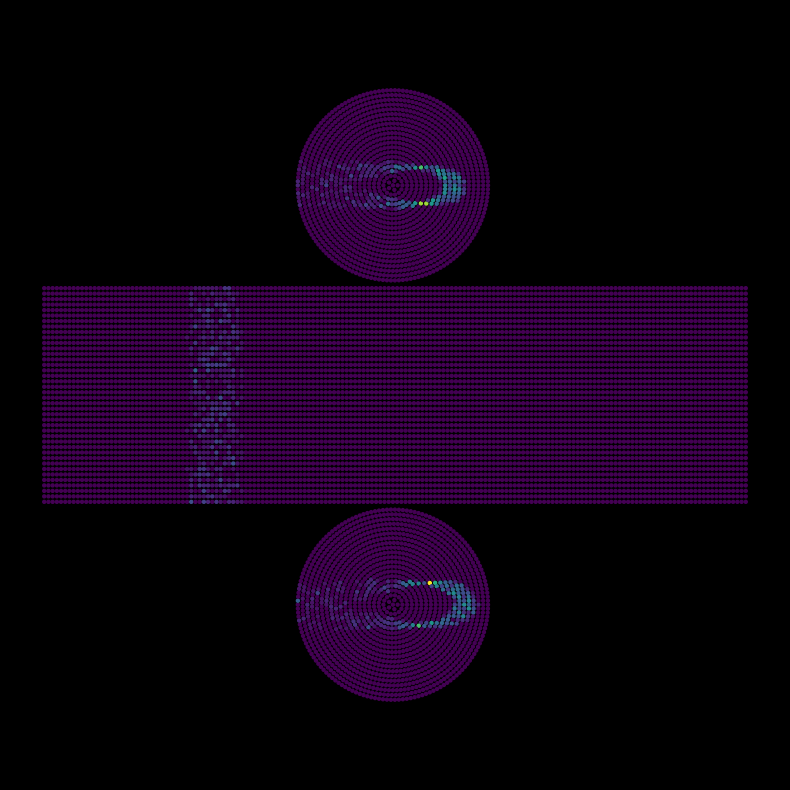

Number of PMTs:  9946


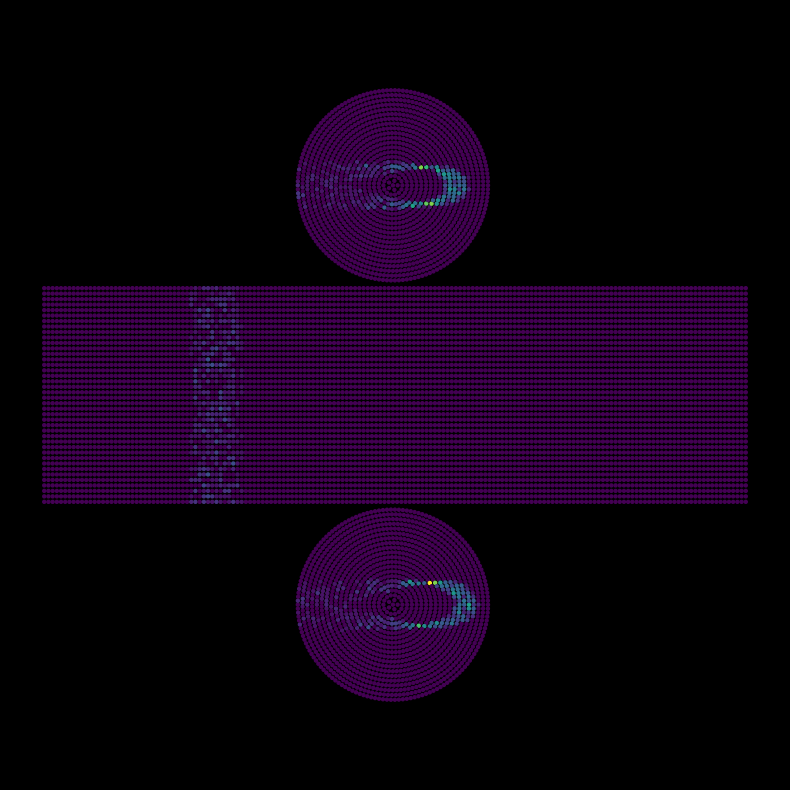

Number of PMTs:  9946


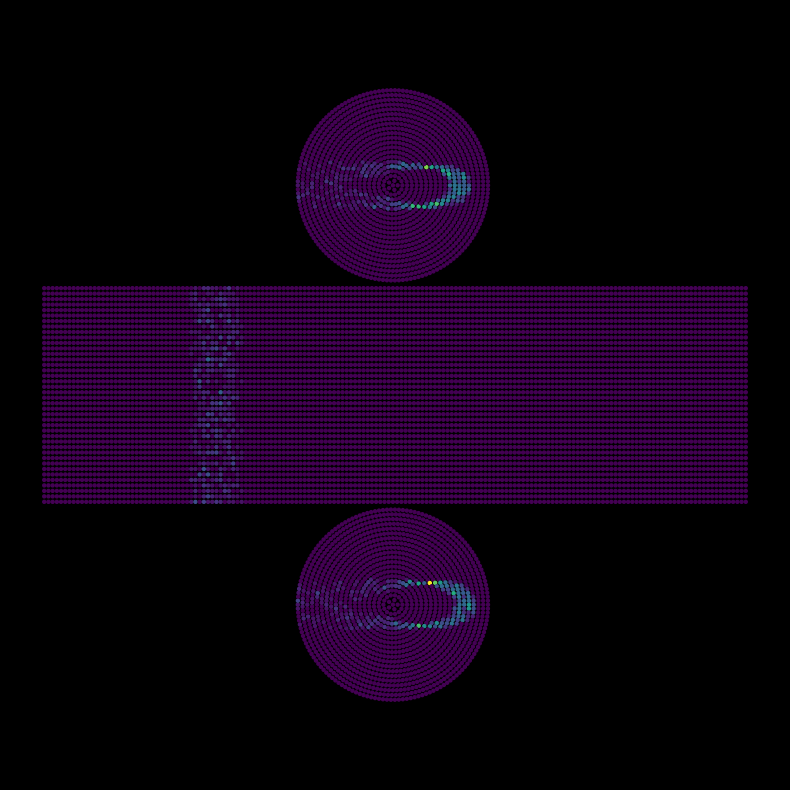

Number of PMTs:  9946


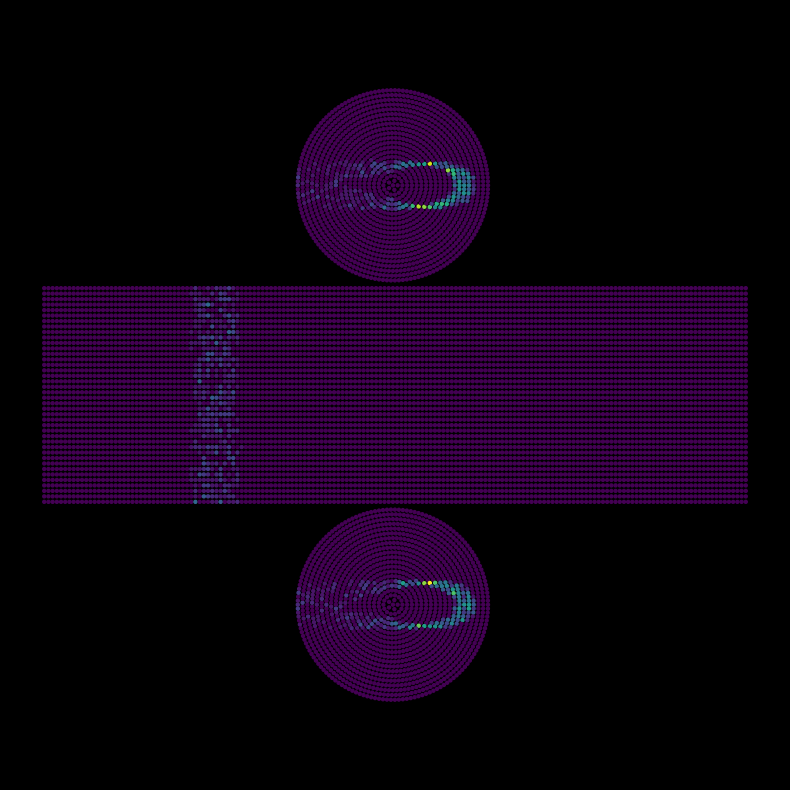

In [14]:
filenames = []#'optimization_start.h5']

for i in range(10):
    filenames.append('optimization_step'+str(i*10)+'.h5')

#filenames.append('optimization_result.h5')

for f in filenames:
    ID_to_position, ID_to_PE, ID_to_case = process_file('test_events/'+f)
    show_2D_display(ID_to_position, ID_to_PE, ID_to_case, cyl_sensor_radius, cyl_radius, cyl_height)#, file_name='evt_example.pdf')